In [1]:
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import platform
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.decomposition import PCA

In [15]:
## Paths Input Here
analysis = "principal_component_analysis/5mm_maxima_v2"
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/maxima_and_minima_rois/roi_roi_correlation/maxima_to_vta/matrix_corrMx_T (10)_revised_with_clinical_data_dataframe.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = os.path.join(os.path.dirname(conn_path), f'{analysis}')
    #out_dir = r'path to out dir here'
    x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/rios_ferguson_yeo_and_conjunction_cluster_roi_roi_correlation/matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Mac style')
    print('I will save to:', out_dir)
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\AD_to_memory_net'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)

save = True
do_transform = False

I have set pathnames in the Mac style
I will save to: /Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/maxima_and_minima_rois/roi_roi_correlation/maxima_to_vta/principal_component_analysis/5mm_maxima_v2


## Option A -- Import Pre-prepared Dataframe
Learn relationships ROIs at the ROI-ROI correl level

In [17]:
data_df = pd.read_csv(conn_path)

#Eliminate Columns of no Interest
try:
    data_df.pop('Unnamed: 0')
    data_df.pop('Randomization Arm')
    data_df.pop('Patient # CDR, ADAS')
    data_df.pop('Age at DOS')
    data_df.pop('Baseline CDR (sum of squares)')
    data_df.pop('% Change from baseline (CDR)')
    data_df.pop('Baseline ADAS-Cog11')    
except:
    print('Could not find ("Unnamed: 0") ')
#Rename variables to prevent errors


#----------------------------------------------------------------Edit Dataframe----------------------------------------------------------------
#Set a list of the variables to be fed into DF
# change_string = ''
# for i in range (0, len(variables_to_change['original'])):
#     change_string += f"variables_to_change['original'][{i}]: variables_to_change['destination'][{i}],"
# change_string = 'data_df.rename(columns={' + change_string[0:-1] + '})'
# data_df = eval(change_string)

#Organize the columns
# import natsort
# natsorted_columns = natsort.natsorted(data_df.columns)
# data_df = data_df.reindex(columns=natsorted_columns)

#Place response column at start of dataframe
# response_series = data_df.pop(variables_to_change['destination'][0])
# data_df.insert(0, variables_to_change['destination'][0], response_series)


#Remove outlier
# outlier_index=[9, 47, 48, 49]
# data_df = data_df.drop(index=outlier_index)

#Standardize the data
preserved_df = data_df.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
#Remove anything you don't want to standardize
# age_df = data_df.pop('age')
data_df.iloc[:,:] = scaler.fit_transform(data_df.iloc[:,:].values)
#reinster things to standardize
# data_df['age'] = age_df

#Handle NaNs
#Drop NANs
data_df.dropna(inplace=True)

display(data_df)

,% Change from baseline (ADAS-Cog11),ferguson_memnet_ant_med_thalamus_left,ferguson_memnet_ant_med_thalamus_right,ferguson_memnet_cerebellum_lobule_9_left,ferguson_memnet_cerebellum_lobule_9_right,ferguson_memnet_corpus_callosum_left,ferguson_memnet_corpus_callosum_right,ferguson_memnet_lat_parietal_cortex_left,ferguson_memnet_lat_parietal_cortex_right,ferguson_memnet_lat_temporal_cortex_left,ferguson_memnet_lat_temporal_cortex_right,ferguson_memnet_med_occipital_cortex_left,ferguson_memnet_med_occipital_cortex_right,ferguson_memnet_sbc_left,ferguson_memnet_sbc_retrospl_jxn_left,ferguson_memnet_sbc_retrospl_jxn_right,ferguson_memnet_sbc_right,ferguson_memnet_sup_frontal_cortex_left,ferguson_memnet_sup_frontal_cortex_right,ferguson_memnet_vent_med_pfc_midline
0,0.292279,-1.077554,-1.128839,-1.273302,-1.161432,-0.908561,-1.027797,-1.275413,-1.800050,0.238235,-0.117838,-0.407707,-0.187311,-1.641514,-1.191992,-1.195518,-1.784450,-1.186529,-1.549629,-0.688405
1,-0.016545,-1.031471,-1.076757,-0.601897,-0.405575,-2.263548,-2.196371,-0.763400,-1.450380,0.692091,0.391274,-1.880621,-1.574840,-1.645075,-1.261055,-1.300331,-1.977048,-0.911376,-1.674271,-0.072879
2,-0.897080,-0.801545,-0.843983,-0.715060,-0.542803,-0.292120,-0.431364,-0.068227,-0.428483,0.872500,0.605216,-1.038785,-0.983595,-1.036189,-0.648747,-0.750701,-1.071984,-0.420963,-0.876535,-0.019412
3,-1.940569,-0.859081,-0.895101,-0.802532,-0.706835,-0.411292,-0.636291,-1.323366,-1.313546,-0.479458,-0.718263,0.634691,0.772036,-1.532725,-1.184311,-1.055979,-1.509745,-1.327825,-1.191184,-1.137639
4,0.517713,-0.713396,-0.708984,-0.338736,0.114357,-1.601225,-1.369843,-1.049822,-0.327602,-2.236684,-2.392051,-0.514966,0.683636,0.596900,-1.749202,-1.712537,0.856031,-1.212434,-0.694483,-1.729133
5,-0.059924,-0.654572,-0.646493,-0.840214,-0.765380,-0.037520,-0.311743,0.002664,-0.237915,0.682429,0.542018,-0.343295,-0.437319,-0.606674,-0.274111,-0.415530,-0.520238,-0.388415,-0.655345,-0.243986
6,0.417254,-0.748196,-0.743567,-0.409457,0.082429,-1.172596,-1.096821,-1.055542,-0.367973,-1.798435,-1.912232,-0.461229,0.617610,0.419280,-1.578732,-1.601189,0.544437,-1.337757,-1.035844,-1.615042
7,0.132272,-0.550803,-0.545716,0.247513,0.495613,-0.798128,-0.606740,-0.981824,0.448430,-1.851529,-1.856591,-0.153395,0.987871,0.525885,-1.376071,-1.318141,0.682850,-1.240204,-0.485918,-1.498601
8,0.106051,-0.043541,0.016667,0.153043,0.394373,0.240669,0.251186,1.054761,0.517234,1.019375,1.121650,-1.159397,-1.414884,0.166908,0.459438,0.331930,0.107695,0.638716,0.060445,0.890946
9,-1.014281,0.504135,0.688743,-0.660561,-0.637964,0.786571,0.475331,0.516587,0.448130,0.063611,0.342623,0.461571,-0.095910,0.498636,0.850887,0.802026,0.454417,0.547352,0.447683,0.153997


In [18]:
from sklearn.decomposition import PCA
import pandas as pd

def pca_function(dataframe, dataframe_indices, num_components=None):
    
    # Define the PCA class/method
    pca = PCA(n_components=num_components)
    x_vals = dataframe.loc[:, dataframe_indices].to_numpy()
    pca.fit(x_vals)

    # Transform the independent variables into their principal components
    pca_vals = pca.transform(x_vals)

    # Create a dataframe from the PCA
    pca_df = pd.DataFrame(pca_vals)

    # Rename the column names
    colnames = []
    for col in pca_df.columns:
        colnames.append('Component_'+str(col+1))
    pca_df.columns = colnames
    
    # Extract the weights of the principal components
    weights = pd.DataFrame(pca.components_, columns=dataframe.loc[:, dataframe_indices].columns.values.tolist())
    weights.index = pca_df.columns

    return pca_df, pca, weights

In [20]:
dataframe_indices = pd.IndexSlice['ferguson_memnet_ant_med_thalamus_left':]
pca_df, pca, weights = pca_function(data_df, dataframe_indices)

print('Principal Components Below')
display(pca_df)

Principal Components Below


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19
0,4.810050,-1.022649,-0.850849,0.012198,-0.520255,0.205783,0.401180,0.045132,-0.190182,-0.094380,0.065494,-0.044909,-0.032645,0.030159,-0.033529,0.027191,-0.001082,0.006144,0.024084
1,4.608342,-3.008573,0.896810,1.330884,-1.089828,0.624848,0.871935,-0.098752,-0.569492,0.002264,0.169761,0.001528,-0.000968,0.032019,0.037979,-0.016808,-0.006947,-0.018860,-0.001707
2,2.105020,-2.271432,-0.393151,0.205594,-0.214435,-0.280624,-0.105718,0.052034,-0.114424,-0.055016,0.002812,0.025578,-0.034886,-0.015289,0.033933,-0.019396,0.005715,0.041161,0.013268
3,4.232196,0.743803,-0.732046,-0.541089,-0.819355,0.076460,-0.290138,0.133094,0.090769,0.109691,-0.058637,-0.054118,-0.022703,-0.028288,-0.000460,-0.005755,0.004940,-0.013591,-0.011402
4,3.590849,2.350047,3.109298,-0.046915,0.743182,-1.156539,0.504434,0.131269,-0.063671,-0.078412,-0.029903,0.037310,-0.018366,-0.091817,0.001580,-0.001502,0.003067,-0.022363,0.004897
5,1.522294,-1.331616,-0.670690,0.042521,0.371987,-0.117821,-0.298020,-0.295340,0.110239,-0.046175,-0.028184,0.020043,-0.037824,0.010694,0.004087,-0.020395,-0.017982,-0.002967,-0.007303
6,3.513370,1.835998,2.458746,-0.380882,0.513876,-1.131906,0.280067,-0.129899,-0.187732,-0.114888,0.048564,-0.003638,0.020973,-0.002195,-0.042540,0.014895,0.005830,-0.011795,-0.000423
7,2.329223,2.283999,2.608832,-0.682098,0.281898,-1.028775,-0.444787,0.206946,-0.192739,-0.015824,0.046310,-0.023870,-0.006643,0.112282,-0.022693,-0.027746,-0.017496,0.024719,-0.008490
8,-1.622162,-2.438006,0.092472,0.386728,0.045055,-0.288411,0.158017,-0.180182,-0.077182,0.091238,0.013917,-0.004052,0.029991,-0.012257,-0.001276,-0.002119,0.002550,0.004880,0.003862
9,-1.615613,0.322613,-1.218106,0.432049,0.965669,-0.215836,-0.059065,-0.386735,-0.011690,0.185653,0.122202,-0.054147,-0.007563,-0.056736,0.000547,-0.033936,0.000027,-0.011100,0.008020


In [21]:
#Get weights from the PCA
print('Weights of Principal Components Below')
display(weights)

Weights of Principal Components Below


,ferguson_memnet_ant_med_thalamus_left,ferguson_memnet_ant_med_thalamus_right,ferguson_memnet_cerebellum_lobule_9_left,ferguson_memnet_cerebellum_lobule_9_right,ferguson_memnet_corpus_callosum_left,ferguson_memnet_corpus_callosum_right,ferguson_memnet_lat_parietal_cortex_left,ferguson_memnet_lat_parietal_cortex_right,ferguson_memnet_lat_temporal_cortex_left,ferguson_memnet_lat_temporal_cortex_right,ferguson_memnet_med_occipital_cortex_left,ferguson_memnet_med_occipital_cortex_right,ferguson_memnet_sbc_left,ferguson_memnet_sbc_retrospl_jxn_left,ferguson_memnet_sbc_retrospl_jxn_right,ferguson_memnet_sbc_right,ferguson_memnet_sup_frontal_cortex_left,ferguson_memnet_sup_frontal_cortex_right,ferguson_memnet_vent_med_pfc_midline
Component_1,-0.236717,-0.238783,-0.237889,-0.232251,-0.226860,-0.257475,-0.256635,-0.255848,-0.083354,-0.129898,-0.027451,0.049519,-0.257289,-0.286014,-0.282392,-0.238335,-0.281425,-0.275821,-0.245933
Component_2,0.233258,0.231083,0.004716,0.000977,0.015637,0.009940,-0.192232,-0.026005,-0.434440,-0.404800,0.428354,0.456211,0.130852,-0.002266,0.055163,0.117708,-0.032940,0.114293,-0.248604
Component_3,-0.121508,-0.120620,0.376520,0.382876,-0.394995,-0.278263,0.039815,0.253457,-0.186580,-0.186283,-0.282935,-0.059670,0.247324,-0.169336,-0.173614,0.316237,-0.097339,0.003138,-0.021113
Component_4,0.339496,0.346968,-0.286240,-0.172973,-0.445336,-0.363879,0.250617,0.203467,-0.064685,-0.034073,-0.093498,-0.163167,-0.142970,0.024020,0.006141,-0.223047,0.276063,0.163456,-0.055844
Component_5,-0.196755,-0.144719,-0.328701,-0.592074,-0.037188,-0.011502,-0.037656,0.157651,-0.026840,0.056134,-0.065300,-0.065581,0.339446,0.080422,0.037249,0.524829,-0.040572,0.192054,-0.066859
Component_6,-0.043284,-0.060653,0.364978,-0.161425,-0.389367,-0.324300,-0.276435,-0.141148,0.240919,0.250493,0.310328,0.188284,-0.095742,0.210943,0.271367,0.025575,-0.088101,0.163897,0.258725
Component_7,0.043546,0.052511,-0.121758,0.105414,-0.117662,-0.030419,-0.097943,-0.774912,-0.171076,-0.138997,-0.202469,-0.204745,0.236386,0.065123,0.127189,0.130924,0.280129,-0.027347,0.200998
Component_8,-0.080830,-0.120604,0.172860,-0.187112,-0.062501,0.349045,-0.200119,0.025253,-0.165337,-0.184788,-0.223733,0.029695,-0.229198,-0.200382,-0.174094,-0.191170,0.145845,0.623936,0.255104
Component_9,-0.394124,-0.312714,-0.148209,0.138609,-0.061967,-0.095814,0.535185,-0.104701,-0.015036,0.008476,0.288040,0.352338,-0.030403,-0.005181,-0.120379,-0.009080,0.394909,0.122062,0.038833
Component_10,-0.388467,-0.034676,0.095256,0.016772,0.053805,-0.031017,0.038424,0.093933,-0.549047,0.030618,0.081037,-0.380885,-0.284577,0.202623,0.466253,-0.070299,-0.015985,0.002033,-0.160362


In [6]:
from calvin_utils.palm import brain_permutation
def permute_pca_weights(df_to_permute, n_permutations, num_components=None):
    '''
    This function receives only a dataframe of things to permute and perform a PCA on
    It then calculates the number of 
    
    Inputs: 
    df_to_permute - a dataframe of things to permute with no excess rows or columns
    n_permutations - number of permutations, simply an integer
    
    Outputs:
    permuted_results - a dataframe of permuted weights for each permutation
    '''
    #initialize array to hold permuted results
    permuted_weights = np.zeros((n_permutations, df_to_permute.shape[1]))
    
    for i in range(0, n_permutations):
        #Permute the input dataframe
        
        #Permute Rows
        for i in range(0, df_to_permute.shape[0]):
            df_to_permute.iloc[i,:] = np.random.permutation(df_to_permute.iloc[i,:])
        #Permute columns
        for i in range(0, df_to_permute.shape[1]):
            df_to_permute.iloc[:,i] = np.random.permutation(df_to_permute.iloc[:,i])
        # permuted_completed_permutation = np.apply_along_axis(lambda x: np.random.permutation(x), 1, df_to_permute.values)
        permuted_df = df_to_permute
        
        #calculate the weights
        dataframe_indices = pd.IndexSlice[:]
        pca_df, fitted_pca, weights = pca_function(permuted_df, dataframe_indices, num_components=num_components)
        permuted_weights[i,:] = weights.iloc[0,:]
    return permuted_weights

def calculate_empiric_p_value(observed_df, permuted_df):
    permutations_occuring_above_observations = np.where(permuted_df > observed_df, 1, 0)
    
    num_occurences_above_observations = np.count_nonzero(permutations_occuring_above_observations)
    num_permutations = permuted_df.shape[0]
    
    empiric_p_value = num_occurences_above_observations/num_permutations
    
    return empiric_p_value

In [7]:
#Permute the PCA to Analyze the Significance of the Weights
from calvin_utils.palm import permute_contrast_matrix
permuted_weights = permute_pca_weights(data_df.loc[:,dataframe_indices], 10000, None)
permuted_weights = pd.DataFrame(permuted_weights, columns=weights.columns)

KeyError: 'one'

In [128]:
#Calculate the p values
p_value = []
for i in range(0, len(weights.columns)):
    p_value.append(calculate_empiric_p_value(weights.iloc[0,i], permuted_weights.iloc[:,i].values))
p_values_df = pd.DataFrame(p_value, weights.columns).transpose()
display(p_values_df)

,Ventral_Attention,Frontoparietal,Default
0,0.0,0.0001,0.0


In [22]:
#Perform PCA
#Merge original and PCA dataframe?
merge = True
##--------------------------------USER INPUT------------------------------------------------

#Merge dataframes
if merge:
    from calvin_utils.merge_dataframes import merge_dataframes
    merged_df = merge_dataframes(data_df.iloc[:, 0:1], pca_df)
else:
    merged_df = pca_df
display(merged_df)
#Merge the dataframe back to the orignal
if save:
    merged_df.to_csv(os.path.join(out_dir, 'pca_with_clinical_data.csv'))
    weights.to_csv(os.path.join(out_dir, 'pca_weights.csv'))

['% Change from baseline (ADAS-Cog11)', 'Component_1', 'Component_2', 'Component_3', 'Component_4', 'Component_5', 'Component_6', 'Component_7', 'Component_8', 'Component_9', 'Component_10', 'Component_11', 'Component_12', 'Component_13', 'Component_14', 'Component_15', 'Component_16', 'Component_17', 'Component_18', 'Component_19']


,% Change from baseline (ADAS-Cog11),Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19
0,0.292279,4.810050,-1.022649,-0.850849,0.012198,-0.520255,0.205783,0.401180,0.045132,-0.190182,-0.094380,0.065494,-0.044909,-0.032645,0.030159,-0.033529,0.027191,-0.001082,0.006144,0.024084
1,-0.016545,4.608342,-3.008573,0.896810,1.330884,-1.089828,0.624848,0.871935,-0.098752,-0.569492,0.002264,0.169761,0.001528,-0.000968,0.032019,0.037979,-0.016808,-0.006947,-0.018860,-0.001707
2,-0.897080,2.105020,-2.271432,-0.393151,0.205594,-0.214435,-0.280624,-0.105718,0.052034,-0.114424,-0.055016,0.002812,0.025578,-0.034886,-0.015289,0.033933,-0.019396,0.005715,0.041161,0.013268
3,-1.940569,4.232196,0.743803,-0.732046,-0.541089,-0.819355,0.076460,-0.290138,0.133094,0.090769,0.109691,-0.058637,-0.054118,-0.022703,-0.028288,-0.000460,-0.005755,0.004940,-0.013591,-0.011402
4,0.517713,3.590849,2.350047,3.109298,-0.046915,0.743182,-1.156539,0.504434,0.131269,-0.063671,-0.078412,-0.029903,0.037310,-0.018366,-0.091817,0.001580,-0.001502,0.003067,-0.022363,0.004897
5,-0.059924,1.522294,-1.331616,-0.670690,0.042521,0.371987,-0.117821,-0.298020,-0.295340,0.110239,-0.046175,-0.028184,0.020043,-0.037824,0.010694,0.004087,-0.020395,-0.017982,-0.002967,-0.007303
6,0.417254,3.513370,1.835998,2.458746,-0.380882,0.513876,-1.131906,0.280067,-0.129899,-0.187732,-0.114888,0.048564,-0.003638,0.020973,-0.002195,-0.042540,0.014895,0.005830,-0.011795,-0.000423
7,0.132272,2.329223,2.283999,2.608832,-0.682098,0.281898,-1.028775,-0.444787,0.206946,-0.192739,-0.015824,0.046310,-0.023870,-0.006643,0.112282,-0.022693,-0.027746,-0.017496,0.024719,-0.008490
8,0.106051,-1.622162,-2.438006,0.092472,0.386728,0.045055,-0.288411,0.158017,-0.180182,-0.077182,0.091238,0.013917,-0.004052,0.029991,-0.012257,-0.001276,-0.002119,0.002550,0.004880,0.003862
9,-1.014281,-1.615613,0.322613,-1.218106,0.432049,0.965669,-0.215836,-0.059065,-0.386735,-0.011690,0.185653,0.122202,-0.054147,-0.007563,-0.056736,0.000547,-0.033936,0.000027,-0.011100,0.008020


[6.01518241e-01 2.33525602e-01 8.55502268e-02 3.12294569e-02
 1.71645488e-02 1.22657683e-02 9.29573772e-03 4.99706001e-03
 3.56624869e-03 3.66444245e-04 1.61161121e-04 1.52109495e-04
 7.03343369e-05 4.71544543e-05 3.86456601e-05 2.28897749e-05
 1.34723415e-05 1.11661089e-05 3.73234411e-06]


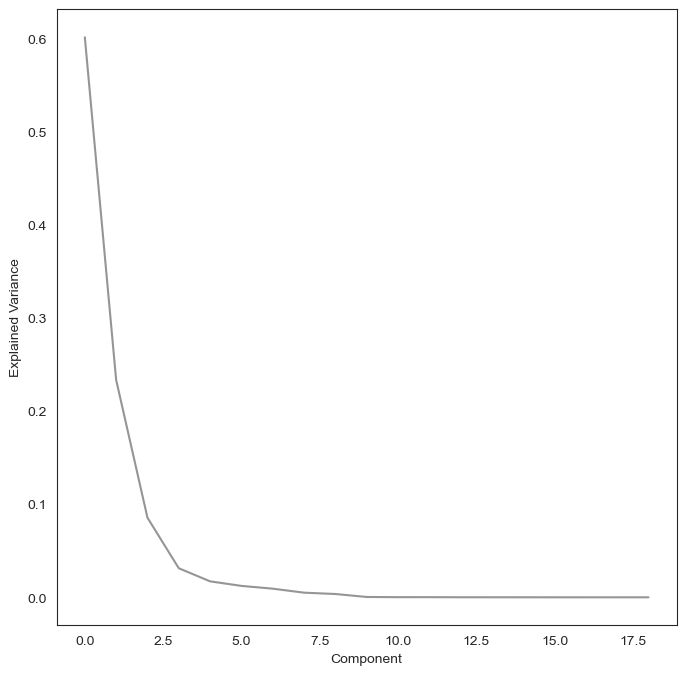

In [23]:
# Explained Variance Plot
# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)
# Plot the explained variance by each component
fig = plt.figure(figsize=(8,8))
plt.plot(range(len(explained_variance)), explained_variance)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.show()

if save:
    fig.savefig(os.path.join(out_dir, 'explained_variance_plot.png'))

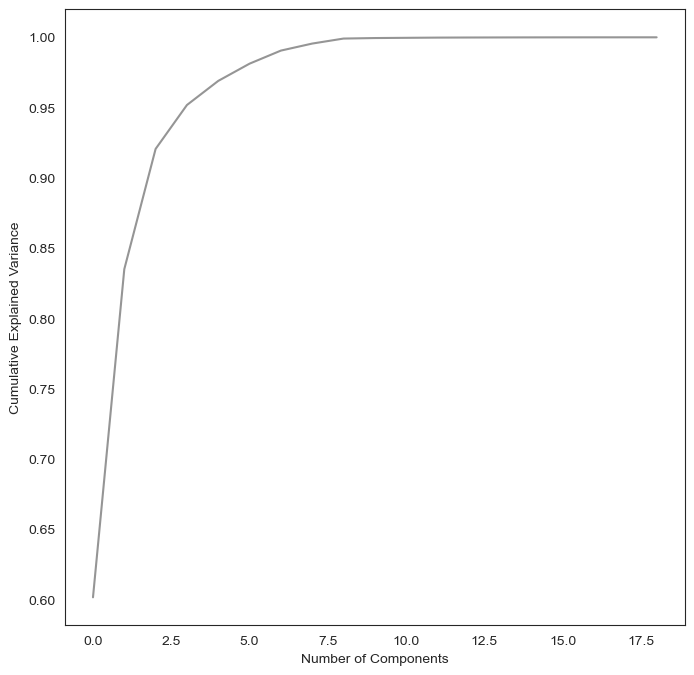

In [24]:
# Scree Plot
# Plot the Scree Plot
fig = plt.figure(figsize=(8,8))
plt.plot(range(len(explained_variance)), np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


if save:
    fig.savefig(os.path.join(out_dir, 'scree_plot.png'))


## Perform Linear Modelling of PCA to Outcomes

In [25]:
import statsmodels.formula.api as smf
# merged_df = merged_df.rename(columns={'% Change from baseline (ADAS-Cog11)': 'perc_improvement'})
results = smf.ols('perc_improvement ~ Component_1 + Component_2 + Component_3', data=merged_df).fit()
print(results.summary2())

PatsyError: Error evaluating factor: NameError: name 'perc_improvement' is not defined
    perc_improvement ~ Component_1 + Component_2 + Component_3
    ^^^^^^^^^^^^^^^^

## Generate a Map From PCA of the Networks

In [150]:
# Perform New PCA Using Fit PCA
## must use RFz maps and z score them (treat in same manner as PCA ROI-ROI analysis)
from calvin_utils.z_score_matrix import z_score_matrix
from calvin_utils.import_matrices import import_matrices_from_folder

yeo_import = import_matrices_from_folder('/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/seed_generated_networks/yeo_r_maps/r_fz_map', file_pattern='/*.nii*')

#z_score the networks
yeo_networks = yeo_import.copy()
for i in range(len(yeo_import.columns)):
    yeo_networks.iloc[:,i] = z_score_matrix(yeo_import.iloc[:,i])

#Set areas outside of the brain back to zero
yeo_networks[yeo_import == 0] = 0

display(yeo_networks)

I will search:  /Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/seed_generated_networks/yeo_r_maps/r_fz_map/*.nii*
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
--------------------------------Performing z_score--------------------------------
pre z score max:  0.7960760593414307 (902629,)
post z score max:  7.542043727464169 (902629,)
--------------------------------Performing z_score--------------------------------
pre z score max:  0.9887834787368774 (902629,)
post z score max:  7.8270831510258265 (902629,)
--------------------------------Performing z_score--------------------------------
pre z score max:  0.9805865287780762 (902629,)
post z score max:  8.903946976831433 (902629,)
--------------------------------Performing z_score--------------------------------
pre z score max:  0.8671120405197144 (902629,)
post z score max:  

,02_somatomotor_seed_AvgR_Fz (1).nii.gz,07_default_AvgR_Fz.nii.gz,04_ventral_attention_AvgR_Fz (1).nii.gz,06_frontoparietal_AvgR_Fz.nii.gz,01_visual_seed_AvgR_Fz (1).nii.gz,05_limbic_AvgR_Fz.nii.gz,03_dorsal_attention_AvgR_Fz (1).nii.gz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
#Isolate the network
yeo_networks = yeo_networks.iloc[:, [1, 2, 3]]
display(yeo_networks)

,07_default_AvgR_Fz.nii.gz,04_ventral_attention_AvgR_Fz (1).nii.gz,06_frontoparietal_AvgR_Fz.nii.gz
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
902624,0.0,0.0,0.0
902625,0.0,0.0,0.0
902626,0.0,0.0,0.0
902627,0.0,0.0,0.0


100%|██████████| 902629/902629 [01:26<00:00, 10401.70it/s]


4.250398857322486
-3.664785794985458
(91, 109, 91)
(902629, 1)
Image saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/principal_component_topology/principal_component_analysis/yeo_seeds



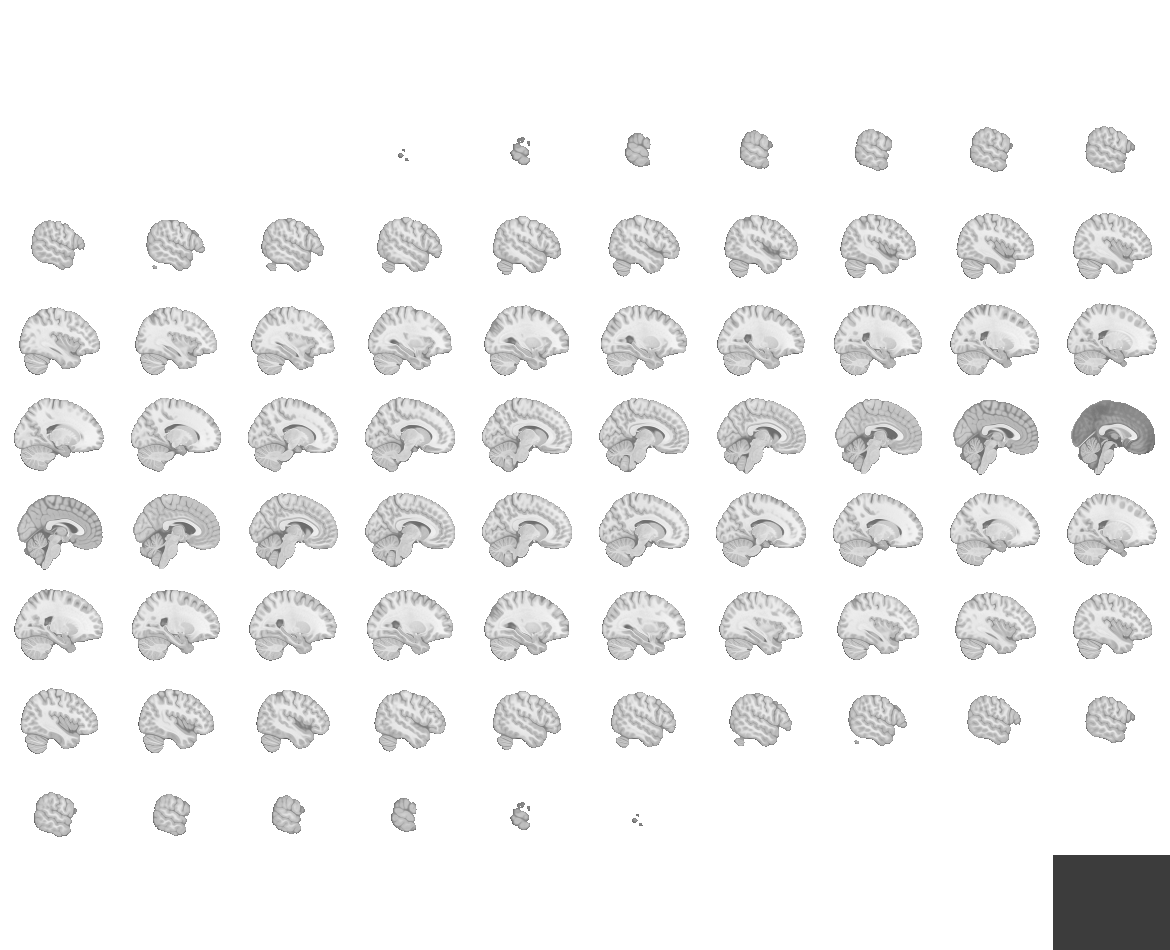
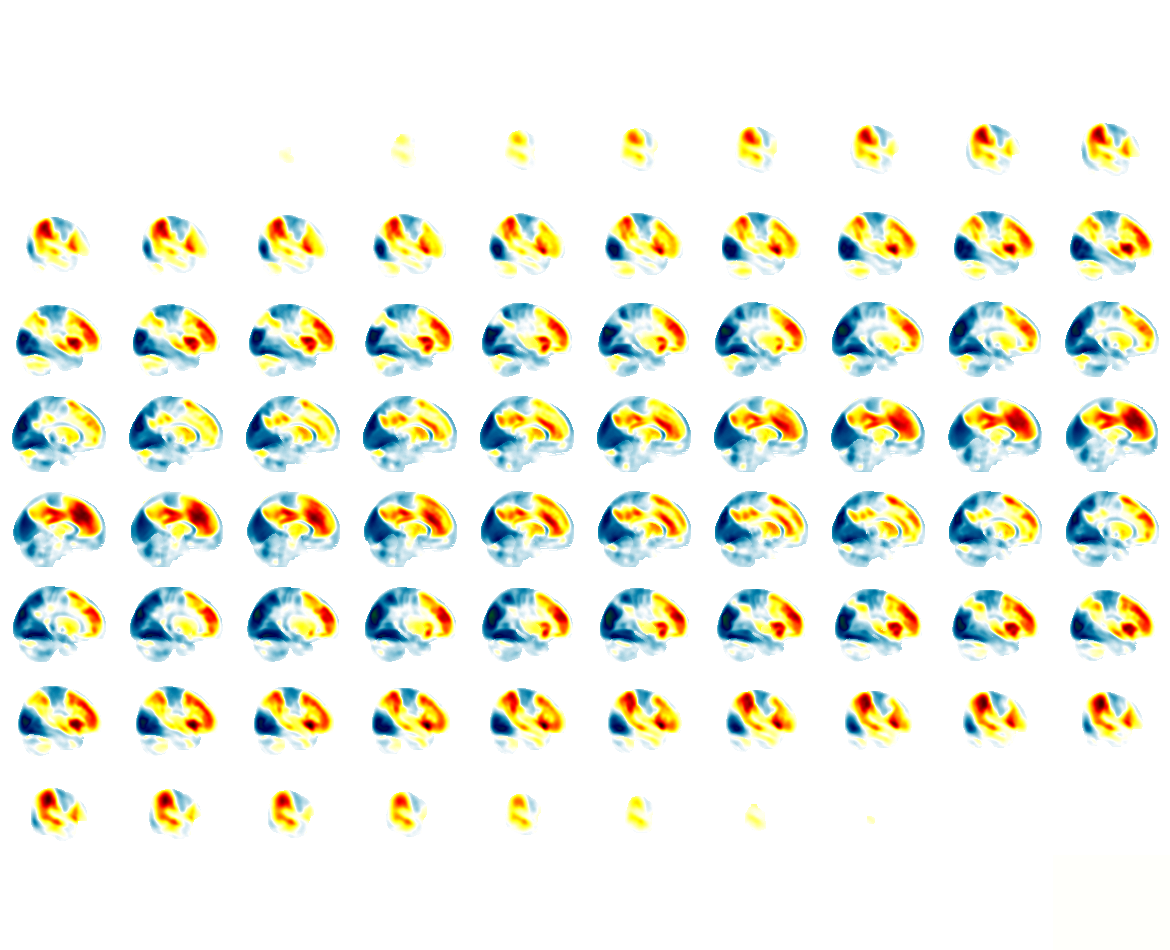

In [152]:
import tqdm
from calvin_utils.generate_nifti import nifti_from_matrix
from nimlab import datasets as nimds
from nilearn import plotting

#Itialize the holding info
pc_1 = []
#Iterate over each voxel, considering the voxel at a given location across each network
for i in tqdm.tqdm(range(0, len(yeo_networks))):
    #Only operate on nonzero voxels
    if np.sum(yeo_networks.iloc[i,:]) != 0:
        #Perform PCA at that voxel based on previously learned PCA
        pc_1.append(pca.transform(yeo_networks.iloc[i,:].to_numpy().reshape(1,-1))[0,0])
    #If voxel=zero, just assign zero
    else:
        pc_1.append(0)
#Place in dataframe
print(np.max(pc_1))
print(np.min(pc_1))
pc1_df = pd.DataFrame(pc_1)

#Save and initialize the nifti
img = nifti_from_matrix(matrix=pc1_df, output_file=f'/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/principal_component_topology/{analysis}')

#Display nifti
mask = nimds.get_img("mni_icbm152")
ovr_html1 = plotting.view_img(img, cut_coords=(0,0,0), title=(f'pc_1_map'), black_bg=False, opacity=.75, cmap='ocean_hot')
ovr_html1

## Use the PC Nifti to Generate a Response Topography

In [33]:
#Create a dataframe to use
var_one = 'Component_1'
input_df = pd.DataFrame({var_one: pc_1})

In [141]:
import tqdm
#Generate a new matrix from the input dataframe
responses = []

#Work on a voxel-wise basis by iterating over index
for i in tqdm.tqdm(range(0, len(input_df))):
    #Do not calculate on zero values as intercept will be applied in the regressoin
    if np.sum(input_df.iloc[i,0]) != 0:
        #Assign a temporary dataframe with values that the statsmodels model is expecting
        temp_df = pd.DataFrame({var_one: input_df.iloc[i,0]}, index=['temp_vals'])
        #Calculate the voxelwise predicted outcome at a given voxel
        responses.append(results.predict(temp_df)[0])
    else:
        #If voxel is zero-connectivity, assign zero so as to avoid application of intercept
        responses.append(0)
        
#Store responses in a dataframe
response_df = pd.DataFrame()
response_df['response_topology'] = responses
#set values outside of brain back to zero
response_df.loc[:, 'response_topology'][input_df.iloc[:,0] == 0] = 0

#Display the figure
img = nifti_from_matrix(response_df, output_file='/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/response_topology/yeo_pc1_response_topology')

mask = nimds.get_img("mni_icbm152")
ovr_html1 = plotting.view_img(img, cut_coords=(0,0,0), title=(f'conjunction'), black_bg=False, opacity=.75, cmap='ocean_hot')
ovr_html1

NameError: name 'input_df' is not defined